
Data loaded successfully
   Execution_Id   Task_Id Developer     LLM  Story_Points  Prompt_Iterations  \
0             1  29682716      Dev1  GPT-4o             1                 22   
1             2  28955401      Dev2  GPT-4o             4                 22   
2             3  33580804      Dev3  GPT-4o            24                 76   
3             4  91102633      Dev4  GPT-4o             8                 30   
4             5  89191553      Dev5  GPT-4o             1                 20   

   Corrective_Prompts  Context_Prompts  Modified_Files  Validation_Detected  \
0                   5                5               3                   15   
1                   5                5               3                   17   
2                  17               20               8                   39   
3                   5                6               4                   22   
4                   5                5               3                   15   

   Manual_Correcti

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RQ1 Mixed-Effects Model Summary:
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Actual_Time_Min
No. Observations: 330     Method:             REML           
No. Groups:       22      Scale:              1752.6907      
Min. group size:  15      Log-Likelihood:     -1701.1889     
Max. group size:  15      Converged:          No             
Mean group size:  15.0                                       
--------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept      18.198     3.674   4.953  0.000  10.997  25.399
Story_Points   22.955     0.781  29.374  0.000  21.424  24.487
Group Var      54.042     2.446                               



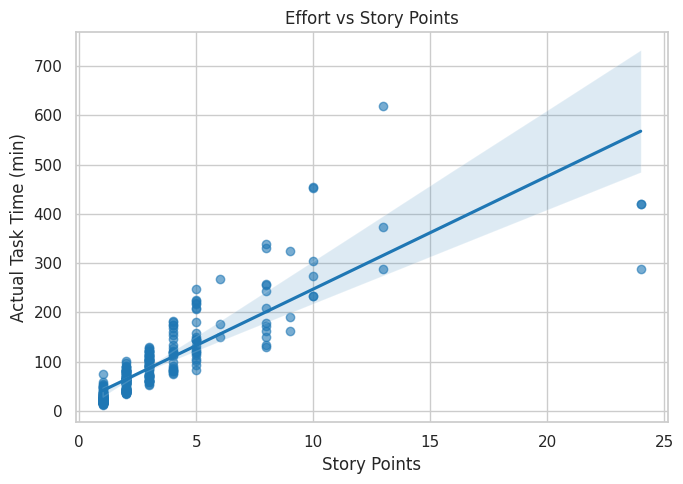

In [ ]:
# ============================================================
# Empirical Analysis of LLM-Assisted Software Effort
# Research Questions: RQ1 – RQ3
# ============================================================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

# ------------------------------------------------------------
# 1. LOAD DATA
# ------------------------------------------------------------

CSV_PATH = "Task_execution_observations.csv"
df = pd.read_csv(CSV_PATH)

# Ensure correct data types
df["Developer"] = df["Developer"].astype("category")
df["Task_Id"] = df["Task_Id"].astype("category")
df["LLM"] = df["LLM"].astype("category")

print("\nData loaded successfully")
print(df.head())
print("\nTotal records:", len(df))

# ============================================================
# RQ1 – VALIDITY OF TRADITIONAL EFFORT METRICS
# ============================================================

print("\n==============================")
print("RQ1 – Traditional Effort Estimation")
print("==============================")

# --- Descriptive effort statistics
print("\nDescriptive Effort Statistics (Overall):")
print(df["Actual_Time_Min"].agg(["mean", "median", "std", "min", "max"]))

# --- Linear Regression: Story Points → Effort
rq1_lm = smf.ols(
    "Actual_Time_Min ~ Story_Points",
    data=df
).fit()

print("\nRQ1 Linear Regression Summary:")
print(rq1_lm.summary())

# --- Mixed-Effects Model (Developer as random effect)
rq1_mixed = smf.mixedlm(
    "Actual_Time_Min ~ Story_Points",
    df,
    groups=df["Developer"]
).fit()

print("\nRQ1 Mixed-Effects Model Summary:")
print(rq1_mixed.summary())

# --- Figure RQ1.1: Effort vs Story Points
plt.figure(figsize=(7, 5))
sns.regplot(
    x="Story_Points",
    y="Actual_Time_Min",
    data=df,
    ci=95,
    color="tab:blue",
    scatter_kws={"alpha": 0.6}
)
plt.xlabel("Story Points")
plt.ylabel("Actual Task Time (min)")
plt.title("Effort vs Story Points")
plt.tight_layout()
plt.show()

